# A/B Test on Email Marketing Campaign

We are comparing the proportions of customers who made a purchase in two groups: those who received a discount and those who did not.

Null Hypothesis (H₀): There is no difference in purchase rates between the discount and no-discount groups.

Alternative Hypothesis (H₁): There is a difference in purchase rates between the two groups.

### Importing Required Libraries

In [53]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [54]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install statsmodels
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [55]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

## Importing Dataset

In [56]:
# Load dataset
file_path = "/Users/akankshanakati/Downloads/Marketingcampaigns.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

## Data Cleaning

In [57]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Customer id           0
Age                   0
Gender                0
Location              0
Email Opened          0
Email Clicked         0
Product page visit    0
Discount offered      0
Purchased             0
dtype: int64


In [58]:
# Check data types
print("\nData types:\n", df.dtypes)


Data types:
 Customer id            int64
Age                    int64
Gender                 int64
Location              object
Email Opened           int64
Email Clicked          int64
Product page visit     int64
Discount offered       int64
Purchased              int64
dtype: object


## Exploratory Data Analysis (EDA)

In [59]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        Customer id        Age     Gender  Email Opened  Email Clicked  \
count     20.00000  20.000000  20.000000     20.000000      20.000000   
mean      10.50000  38.250000   0.550000      0.500000       0.600000   
std        5.91608  15.382406   0.510418      0.512989       0.502625   
min        1.00000  15.000000   0.000000      0.000000       0.000000   
25%        5.75000  24.500000   0.000000      0.000000       0.000000   
50%       10.50000  38.000000   1.000000      0.500000       1.000000   
75%       15.25000  53.500000   1.000000      1.000000       1.000000   
max       20.00000  62.000000   1.000000      1.000000       1.000000   

       Product page visit  Discount offered  Purchased  
count            20.00000         20.000000  20.000000  
mean              2.10000          0.500000   0.500000  
std               1.68273          0.512989   0.512989  
min               0.00000          0.000000   0.000000  
25%               1.00000          

In [60]:
# Gender distribution
print("\nGender Distribution:\n", df['Gender'].value_counts())


Gender Distribution:
 Gender
1    11
0     9
Name: count, dtype: int64


In [61]:
# Discount vs Purchase
print("\nPurchase by Discount Offered:\n", pd.crosstab(df['Discount offered'], df['Purchased']))


Purchase by Discount Offered:
 Purchased         0  1
Discount offered      
0                 7  3
1                 3  7


## A/B Testing
### Define Groups

Group A (Control Group): Customers who did not receive a discount (Discount offered = 0)

Group B (Treatment Group): Customers who did receive a discount (Discount offered = 1)

In [69]:
# Group A: No discount
group_a = df[df['Discount offered'] == 0]
purchases_a = group_a['Purchased'].sum()
n_a = len(group_a)

# Group B: Discount offered
group_b = df[df['Discount offered'] == 1]
purchases_b = group_b['Purchased'].sum()
n_b = len(group_b)

## Perform Two-Proportion Z-Test

In [63]:
# Two-proportion z-test
count = [purchases_a, purchases_b]
nobs = [n_a, n_b]
stat, pval = proportions_ztest(count, nobs)

print("\n--- A/B Test Results ---")
print(f"Group A (No Discount): {purchases_a}/{n_a} = {purchases_a/n_a:.2f}")
print(f"Group B (Discount Offered): {purchases_b}/{n_b} = {purchases_b/n_b:.2f}")
print(f"Z-Statistic: {stat:.4f}")
print(f"p-value: {pval:.4f}")


--- A/B Test Results ---
Group A (No Discount): 3/10 = 0.30
Group B (Discount Offered): 7/10 = 0.70
Z-Statistic: -1.7889
p-value: 0.0736


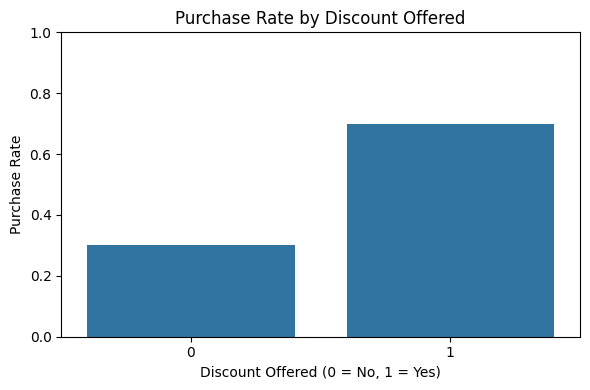

In [64]:
# Plot: Purchase Rate by Discount
purchase_rate_by_discount = df.groupby('Discount offered')['Purchased'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=purchase_rate_by_discount.index, y=purchase_rate_by_discount.values)
plt.title("Purchase Rate by Discount Offered")
plt.xlabel("Discount Offered (0 = No, 1 = Yes)")
plt.ylabel("Purchase Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Results

In [65]:
# Interpretation hint
if pval < 0.05:
    print("Conclusion: Statistically significant difference (reject H0).")
else:
    print("Conclusion: No statistically significant difference (fail to reject H0).")

Conclusion: No statistically significant difference (fail to reject H0).


## Conclusion
There is no statistically significant difference in purchase rates between the two groups at a 5% significance level, though the result is close (p ≈ 0.07). This suggests discounts may have a potential impact, but a larger sample is needed for more confidence.

## Predictive Modeling: Logistic Regression to Predict Purchase Behavior

### Defining and Training Model

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define features and target again
features = ['Age', 'Gender', 'Email Opened', 'Email Clicked', 'Product page visit', 'Discount offered']
X = df[features]
y = df['Purchased']

# Recreate train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Results

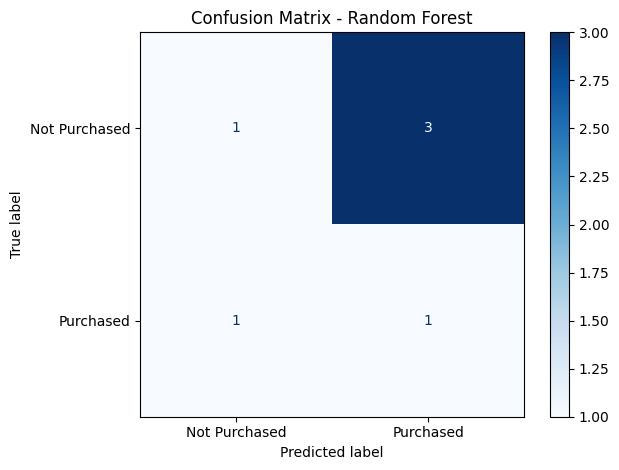

In [67]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluation metrics
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions, output_dict=True)

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

# Plot updated confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    rf_model, X_test, y_test,
    display_labels=["Not Purchased", "Purchased"],
    cmap="Blues"
)
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

In [68]:
# Output values
(rf_conf_matrix, rf_class_report, feature_importances)

(array([[1, 3],
        [1, 1]]),
 {'0': {'precision': 0.5,
   'recall': 0.25,
   'f1-score': 0.3333333333333333,
   'support': 4.0},
  '1': {'precision': 0.25,
   'recall': 0.5,
   'f1-score': 0.3333333333333333,
   'support': 2.0},
  'accuracy': 0.3333333333333333,
  'macro avg': {'precision': 0.375,
   'recall': 0.375,
   'f1-score': 0.3333333333333333,
   'support': 6.0},
  'weighted avg': {'precision': 0.4166666666666667,
   'recall': 0.3333333333333333,
   'f1-score': 0.3333333333333333,
   'support': 6.0}},
 Age                   0.412263
 Product page visit    0.266361
 Discount offered      0.113101
 Email Clicked         0.078140
 Email Opened          0.070095
 Gender                0.060040
 dtype: float64)

## Conclusion: 
Discount offered has the strongest positive effect on purchase likelihood, followed by Gender (likely favoring females).